## Higgs Effective Field Theory: Spectra
Created: Feb 12, 2024 Nicola de Filippis, Kurtis Johnson, Harrison B. Prosper<br>

### Introduction 

The purpose of this project is to approximate $\mathbb{P}(\lambda \le \lambda_0 | \theta) = \mathbb{E}(Z | \theta)$ in two different ways: 1) using a 3D histogram and 2) a machine learning (ML) model, where for a given hypothesis $H_0: \theta = \theta_0$ versus $H_1: \theta \ne \theta_0$, $\lambda_0$ is the observed value of a test statistic $\lambda$ with the property that large values of the test statistic *disfavor* the hypothesis $H_0$. In this project, the physics model of interest is the Higgs effective field theory (HEFT), defined by a 5D parameter space of Wilson coefficients[1]:
\begin{align}
    \theta & = c_{hhh}, c_t, c_{tt}, c_{ggh}, c_{gghh}.
\end{align}

For this investigation, we restrict our attention to a single observable, namely, the di-Higgs mass denoted by $m_{hh}$. This notebook plots the differential cross section[1]
\begin{align}
    \frac{d\sigma}{d m_{hh}} 
    & = a_{1} c_{t}^{4} + a_{2} c_{tt}^{2} + a_{3} c_{t}^{2} c_{hhh}^{2} + a_{4} c_{ggh}^{2} c_{hhh}^{2}
    \nonumber\\
    & + a_{5} c_{gghh}^{2} + a_{6} c_{t}^{2} c_{tt} + a_{7} c_{t}^{3} c_{hhh} 
    \nonumber\\
    & + a_{8} c_{t} c_{hhh} c_{tt} + a_{9} c_{ggh} c_{hhh} c_{tt} + a_{10} c_{gghh} c_{tt} 
    \nonumber\\ 
    & + a_{11} c_{t}^{2} c_{ggh} c_{hhh} + a_{12} c_{t}^{2} c_{gghh} 
    \nonumber\\
    & + a_{13} c_{t} c_{ggh} c_{hhh}^{2} + a_{14} c_{t} c_{gghh} c_{hhh} \nonumber\\
    & + a_{15} c_{gghh} c_{ggh} c_{hhh} + a_{16} c_{t}^{3} c_{ggh} \nonumber\\
    & + a_{17} c_{t} c_{ggh} c_{tt} + a_{18} c_{t} c_{ggh}^{2} c_{hhh}  \nonumber\\
    & + a_{19} c_{t} c_{gghh} c_{ggh} + a_{20} c_{t}^{2} c_{ggh}^{2}  \nonumber\\ 
    & + a_{21} c_{ggh}^{2} c_{tt} + a_{22} c_{ggh}^{3} c_{hhh} \nonumber\\
    & + a_{23} c_{gghh} c_{ggh}^{2} , 
\end{align}
for each HEFT parameter point, where the coefficients $a_i$ depend on the di-Higgs mass $m_{hh}$. In this investigation, we set $c_{hhh} = c_t = 1$, which reduces the parameter space to 3 dimensions (note, `klambda` is a synonym for $c_{hhh}$) in which case the differential cross section simplifies to
\begin{align}
    \frac{d\sigma}{d m_{hh}} & = b_1 \nonumber\\
    & + b_2 c_{gghh} + b_3 c_{ggh} + b_4 c_{tt} \nonumber\\ 
    & + b_5 c_{tt} c_{gghh} +  b_6 c_{gghh} c_{ggh} + b_7 c_{tt} c_{ggh} 
    \nonumber\\
    &  + b_8 c_{tt} c_{ggh}^2 + b_9 c_{gghh} c_{ggh}^2 + b_{10} c_{tt}^2  + b_{11} c_{gghh}^2 + b_{12} c_{ggh}^2 + b_{13} c_{ggh}^3 ,
\end{align}
where we have introduced 13 new coefficients, $b_i(m_{hh})$, formed from the original coefficients $a_i$.

### References
  1. Lina Alasfar *et al.*, arXiv:2304.01968v1.

In [1]:
import os, sys

# the standard module for tabular data
import pandas as pd

# the standard module for array manipulation
import numpy as np

# the standard modules for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

### Load data

Note: $\kappa_\lambda \equiv c_{hhh}$.

In [3]:
datafile = f'../data/powheg_total_param_closeBP.csv'

print('loading %s' % datafile)
df = pd.read_csv(datafile)
print('number of rows:', len(df))

df[:5]

loading ../data/powheg_total_param_closeBP.csv
number of rows: 168


,klambda,CT,CTT,CGHH,CGGHH,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,101
0,1.0,1.0,-1.5,-0.6,0.6,0.0,0.0,0.0,0.0,0.0,...,0.005091,0.005331,0.003152,0.003647,0.003640,0.002667,0.002908,0.003146,0.004364,0.095064
1,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000858,0.001574,0.001289,0.001002,0.000430,0.001001,0.000429,0.001001,0.000430,0.012881
2,1.0,1.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000134,0.000134,0.000144,0.000072,0.000123,0.000061,0.000153,0.000093,0.000113,0.002095
3,1.0,1.0,-3.0,-1.0,-0.8,0.0,0.0,0.0,0.0,0.0,...,0.018563,0.006749,0.015196,0.010141,0.015190,0.010134,0.013507,0.003378,0.008441,0.130053
4,1.0,1.0,-3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.013665,0.015821,0.019422,0.014372,0.010073,0.015819,0.014374,0.010777,0.014385,0.281800


### Convert to $\texttt{numpy}$ arrays

In [4]:
# get Wilson coefficients
wilson = df[['CTT', 'CGHH', 'CGGHH']].to_numpy()
print(wilson.shape)

# get spectra
first_bin= 15
last_bin = 100

# construct bin names
cols = [str(x) for x in range(first_bin, last_bin)]
hists= df[cols].to_numpy()

print(hists.shape)

(168, 3)
(168, 85)


In [5]:
def plot_spectra(d, filename='fig_mhh.pdf', fgsize=(8, 4), ftsize=18):

    # compute mid-points of bins and map mhh to unit interval
    N, xbins = d.shape
    x = np.linspace(0, 1, xbins+1)
    # x[1:] = x[1], x[2] ...,x[n-1]
    # x[:-1]= x[0], x[2],...,x[n-2]
    x = (x[1:]+x[:-1])/2

    # make a plot with a single figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fgsize)

    xmin, xmax = 0, 1.0
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$m_{hh}$', fontsize=ftsize)

    ymin, ymax = 0, 2.5
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$d\sigma / d m_{hh}$', fontsize=ftsize)

    # loop over HEFT points
    for row in d:
        ax.hist(x, 
                bins=xbins, 
                range=(xmin, xmax), 
                weights=row,
                alpha=0.1)
    ax.grid() 
    
    plt.tight_layout()
    plt.savefig(filename)

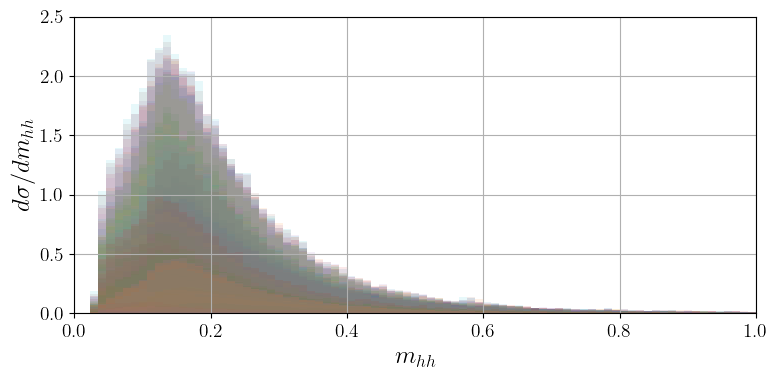

In [6]:
plot_spectra(hists)